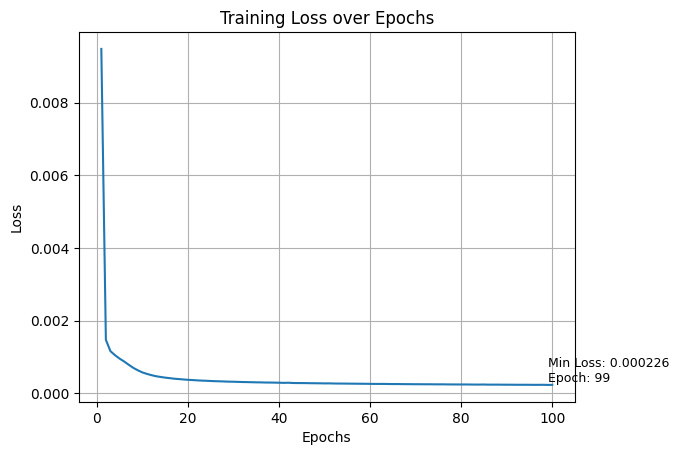

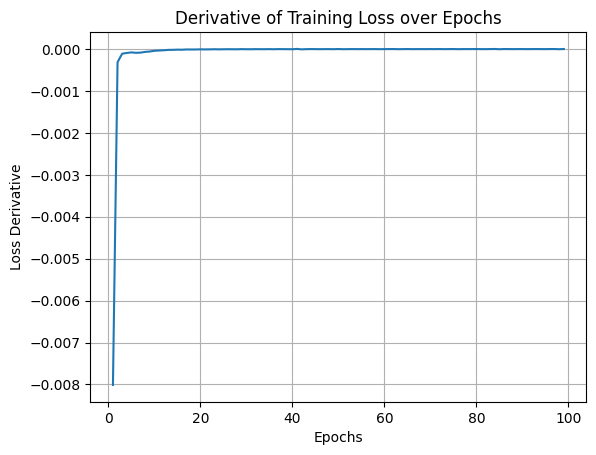

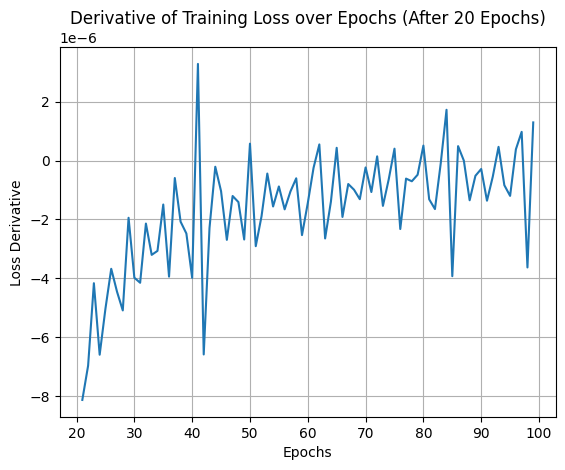

In [6]:
epochs = 100
loss_list = [0.009480932827403992, 0.001469332289253624, 0.0011558177069542382, 0.0010451258410138302, 0.0009519791333883825, 0.0008719649729900251, 0.0007827621589685309, 0.0006978875807552416, 0.0006299504383613733, 0.0005712694433997571, 0.0005299996203383312, 0.0004951064828747605, 0.00046580735158494507, 0.0004456766795759112, 0.00042711304847836777, 0.00041279357081997484, 0.00039698148559036905, 0.0003874751994257025, 0.000376795766764604, 0.00036687149238442317, 0.00035995180548146284, 0.00035182502460393955, 0.0003448599412747147, 0.0003406955904072947, 0.0003341030829293219, 0.000329074611116109, 0.0003253993745261373, 0.0003209471489968304, 0.00031585798478828316, 0.000313914769964835, 0.0003099369210925646, 0.0003057872162606541, 0.00030364683473610004, 0.00030044450304995225, 0.00029737711347453194, 0.0002958837661545584, 0.000291942025889858, 0.0002913481568567727, 0.00028927164974279984, 0.0002867942133796418, 0.00028281218424559655, 0.0002860917191512216, 0.0002795083012705816, 0.000277218791360731, 0.0002770071575794717, 0.000275966379786861, 0.0002732736894192546, 0.00027206957609477204, 0.00027065933795949516, 0.0002679785672486108, 0.0002685513793478301, 0.0002656434927545353, 0.00026375105863285264, 0.00026330833363650977, 0.0002617478379383191, 0.00026086779845964657, 0.0002592104637200028, 0.0002581594031849032, 0.0002575561184950894, 0.00025502460341036244, 0.00025357887339707153, 0.00025333167434315345, 0.00025387800294739544, 0.00025123232574627126, 0.0002498341426210535, 0.00025026622244310947, 0.0002483508680464935, 0.00024755374399794265, 0.00024656293909678035, 0.0002452502419651666, 0.000245015833630628, 0.00024394594524320152, 0.00024408771058736167, 0.00024254878159034714, 0.0002419084643916489, 0.00024231056980971474, 0.0002399853840282723, 0.00023937156149282928, 0.00023866756043652176, 0.0002381844940441779, 0.00023869179662476515, 0.0002373756784534938, 0.00023572795510990143, 0.0002356334598660622, 0.00023735611199024906, 0.00023342959549512018, 0.00023391854059164318, 0.00023391401611203968, 0.0002325645610639739, 0.0002320464485562149, 0.000231759439807312, 0.00023039519469105914, 0.00022984625581343112, 0.00023031109389868172, 0.00022947371827939958, 0.00022827384718101447, 0.00022865450148030355, 0.00022962836155307915, 0.0002259983303910532, 0.00022729214665710804]
import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
min_loss = min(loss_list)
min_epoch = loss_list.index(min_loss) + 1
plt.text(min_epoch, min_loss, f'Min Loss: {min_loss:.6f}\nEpoch: {min_epoch}', fontsize=9, verticalalignment='bottom')
plt.grid(True)
plt.show()

#plot the derivative of loss_list
import numpy as np
loss_derivative = np.diff(loss_list)
plt.plot(range(1, epochs), loss_derivative)
plt.xlabel('Epochs')
plt.ylabel('Loss Derivative')
plt.title('Derivative of Training Loss over Epochs')

plt.grid(True)
plt.show()

#exclude the first 20 epochs and plot derivative again
plt.plot(range(21, epochs), loss_derivative[20:])
plt.xlabel('Epochs')
plt.ylabel('Loss Derivative') 
plt.title('Derivative of Training Loss over Epochs (After 20 Epochs)')

plt.grid(True)
plt.show()


In [1]:


import pathlib as p
from preprocessing import split_dataset, scale_to_reference_img, pad_to_shape, normalize, get_patches, reconstruct_from_patches
from evaluations import calculate_metrics
import nibabel as nib

# interpolated
DATA_DIR = p.Path.home()/"data"/"bobsrepository"
t1_files = sorted(DATA_DIR.rglob("*T1w.nii.gz"))
t2_files = sorted(DATA_DIR.rglob("*T2w.nii.gz"))
t2_LR_files = sorted(DATA_DIR.rglob("*T2w_LR.nii.gz"))

patch_size = (32, 32, 32)
stride = (16, 16, 16)
target_shape = (192, 224, 192)  

files = list(zip(t1_files, t2_files, t2_LR_files))
train, val, test = split_dataset(files)
ref_img = nib.load(str(t1_files[0]))


In [2]:

train_t1, train_t2, train_t2_LR = get_patches(train, patch_size, stride, target_shape, ref_img)
val_t1, val_t2, val_t2_LR = get_patches(val, patch_size, stride, target_shape, ref_img)
test_t1, test_t2, test_t2_LR = get_patches(test, patch_size, stride, target_shape, ref_img)


real_images = []
interpolated_images = []



In [ ]:


for t1_file, t2_file, t2_LR_file in val:
    #scaling to reference image
    t2_img = scale_to_reference_img(nib.load(t2_file), ref_img)
    t2_LR_img = scale_to_reference_img(nib.load(t2_LR_file), ref_img)
    #padding to be divisible by patch size
    t2_img = pad_to_shape(t2_img, target_shape)
    t2_LR_img = pad_to_shape(t2_LR_img, target_shape)
    #normalizing
    t2_img = normalize(t2_img)
    t2_LR_img = normalize(t2_LR_img)
    #add patches
    interpolated_images.append(t2_LR_img.get_fdata())
    real_images.append(t2_img.get_fdata())

metrics = calculate_metrics(real_images, interpolated_images)
print(f"Interpolated - PSNR: {metrics['psnr']}, SSIM: {metrics['ssim']}, NRMSE: {metrics['nrmse']}, MSE: {metrics['mse']}")

#plot the middle slice of all images in a grid
import matplotlib.pyplot as plt
import numpy as np
num_images = len(real_images)
cols = 4
rows = num_images // cols + int(num_images % cols > 0)
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    mid_slice = real_images[i].shape[2] // 2
    plt.imshow(real_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Real Image {i+1}")
plt.suptitle('Real Images - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:

#same for interpolated images
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    mid_slice = interpolated_images[i].shape[2] // 2
    plt.imshow(interpolated_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Interpolated Image {i+1}")
plt.suptitle('Interpolated Images - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()

psnr, ssim, nrmse, mse = metrics['psnr'], metrics['ssim'], metrics['nrmse'], metrics['mse']
#create a table with the metrics with interpolated, 100 epochs and 1000 epochs for excel
import pandas as pd
data = {
    "Method": ["Interpolated", "100 Epochs", "200 Epochs"],
    "PSNR": [psnr, 35.3334349, 35.82448648],
    "SSIM": [ssim, 0.983722736, 0.987187086],
    "NRMSE": [nrmse, 0.062806367, 0.061584326],
    "MSE": [mse, 0.00029815, 0.000265186]
}
df = pd.DataFrame(data)
print(df)



In [3]:
#IMAGE RECONSTRUCTION

#load Unet weights
import torch
from monai.networks.nets import UNet
DATA_DIR = p.Path.home()/"data"/"bobsrepository"

net = UNet(
    spatial_dims=3,
    in_channels=2,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=None,
)
net.load_state_dict(torch.load(DATA_DIR/"outputs"/"2025-10-09T01:21:50.663176_model_weights.pth", map_location="cpu"))

real_images = []
generated_images = []

net.eval()
with torch.no_grad():
    for i in range(len(val_t1)):
        all_outputs = []
        for j in range(len(val_t1[0])):
            input1 = torch.tensor(val_t1[i][j]).float()
            input2 = torch.tensor(val_t2_LR[i][j]).float()
            inputs = torch.stack([input1, input2], dim=0).unsqueeze(0)  # (1, 2, 64, 64, 64)
            output = net(inputs)
            all_outputs.append(output.squeeze(0).squeeze(0).cpu().numpy())  # (64, 64, 64)
        gen_reconstructed = reconstruct_from_patches(all_outputs, target_shape, stride)
        real_reconstructed = reconstruct_from_patches(val_t2[i], target_shape, stride)
        generated_images.append(gen_reconstructed)
        real_images.append(real_reconstructed)
        print(f"Processed validation image {i+1}/{len(val_t1)}")



/Users/al1612le/mri-sr-bob/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Processed validation image 1/11
Processed validation image 2/11
Processed validation image 3/11
Processed validation image 4/11
Processed validation image 5/11
Processed validation image 6/11
Processed validation image 7/11
Processed validation image 8/11
Processed validation image 9/11
Processed validation image 10/11
Processed validation image 11/11


In [5]:
interpolated_images = []
for i in range(len(val_t1)):
        
        interpolated_reconstructed = reconstruct_from_patches(val_t2_LR[i], target_shape, stride)
        interpolated_images.append(interpolated_reconstructed)
        print(f"Processed validation image {i+1}/{len(val_t1)}")

real_images = []
for i in range(len(val_t2)):
        
        real_reconstructed = reconstruct_from_patches(val_t2[i], target_shape, stride)
        real_images.append(real_reconstructed)
        print(f"Processed validation image {i+1}/{len(val_t1)}")

Processed validation image 1/11
Processed validation image 2/11
Processed validation image 3/11
Processed validation image 4/11
Processed validation image 5/11
Processed validation image 6/11
Processed validation image 7/11
Processed validation image 8/11
Processed validation image 9/11
Processed validation image 10/11
Processed validation image 11/11
Processed validation image 1/11
Processed validation image 2/11
Processed validation image 3/11
Processed validation image 4/11
Processed validation image 5/11
Processed validation image 6/11
Processed validation image 7/11
Processed validation image 8/11
Processed validation image 9/11
Processed validation image 10/11
Processed validation image 11/11


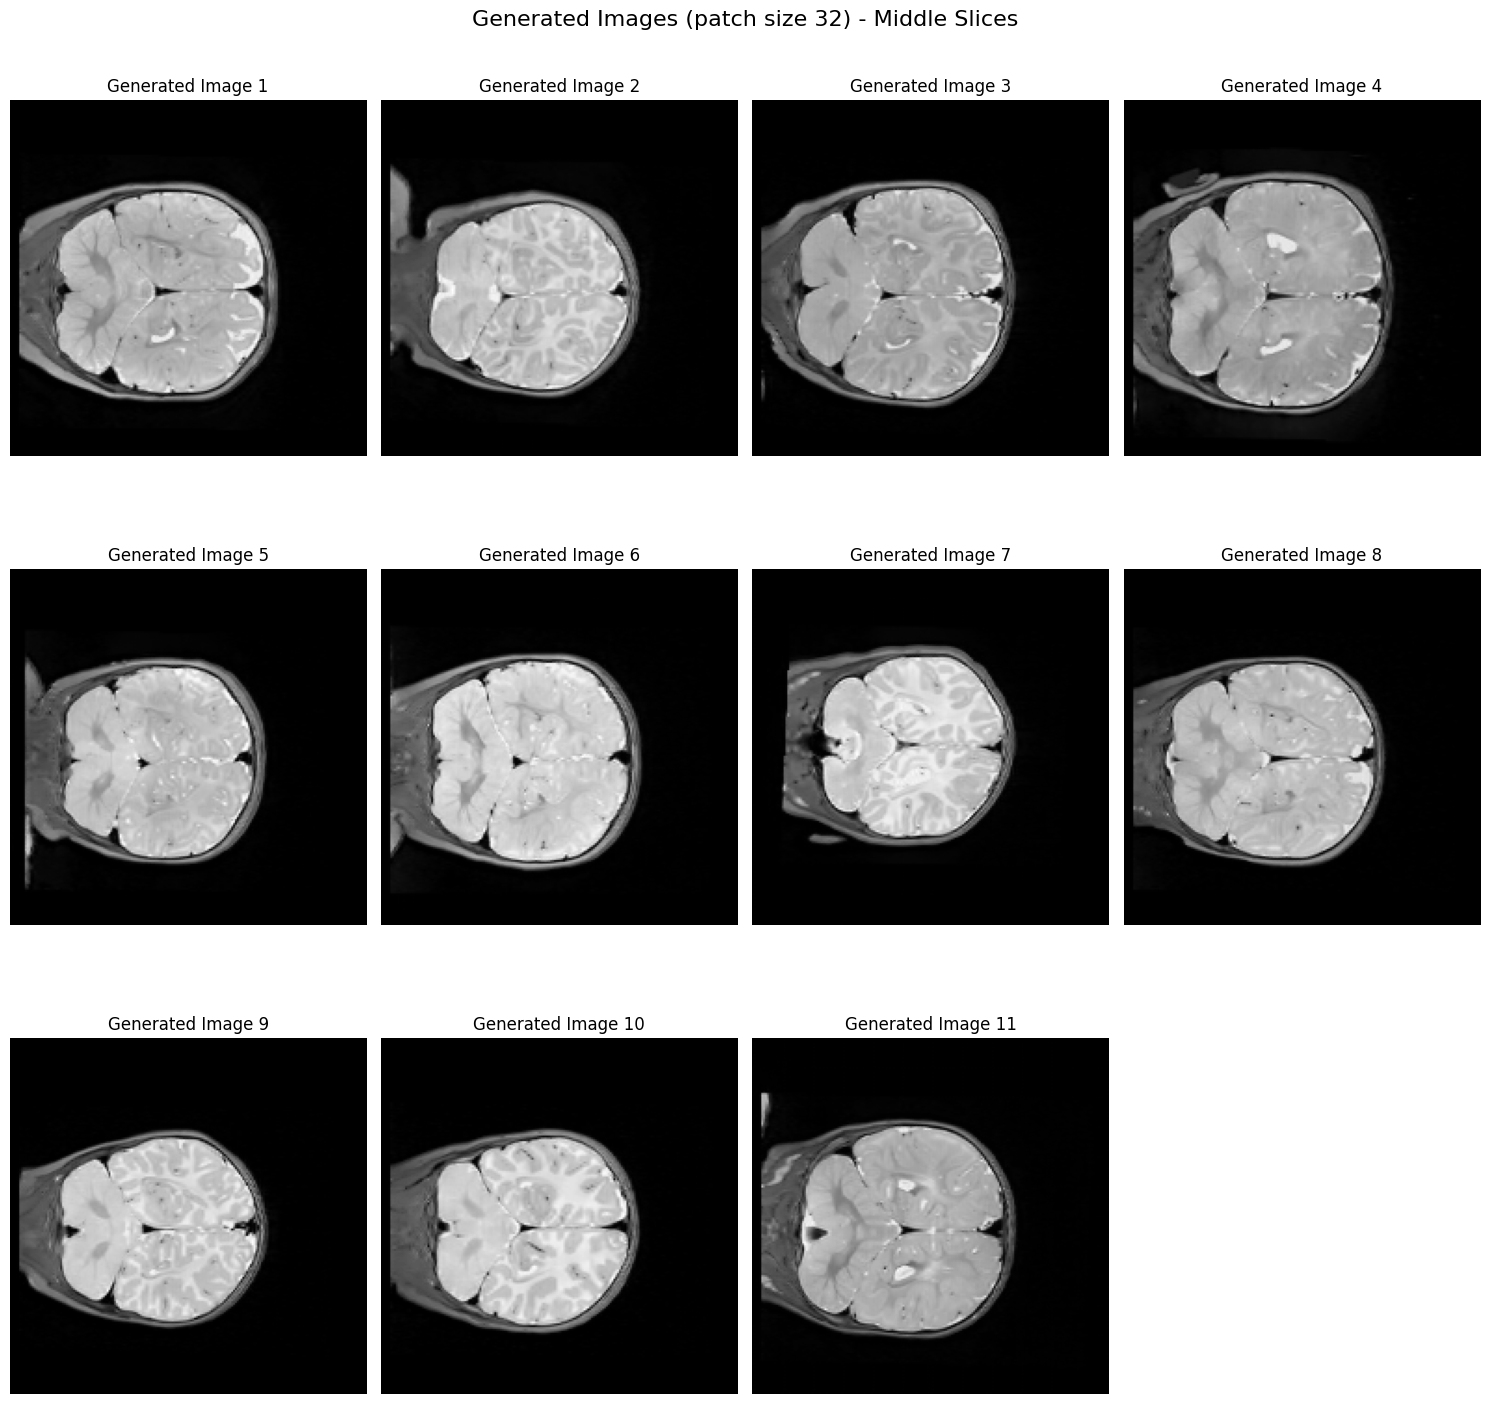

In [9]:

#plot the middle slice of all images in a grid
import matplotlib.pyplot as plt
import numpy as np
num_images = len(generated_images)
cols = 4
rows = num_images // cols + int(num_images % cols > 0)
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    mid_slice = generated_images[i].shape[2] // 2
    plt.imshow(generated_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Generated Image {i+1}")
plt.suptitle('Generated Images (patch size 32) - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()



In [21]:
#plot the middle slice of all images in a grid
import matplotlib.pyplot as plt
import numpy as np
num_images = len(real_images)
cols = 4
rows = num_images // cols + int(num_images % cols > 0)
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    mid_slice = real_images[i].shape[2] // 2
    plt.imshow(real_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Real Image {i+1}")
plt.suptitle('Real Images (reconstructed) - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1500x1500 with 0 Axes>

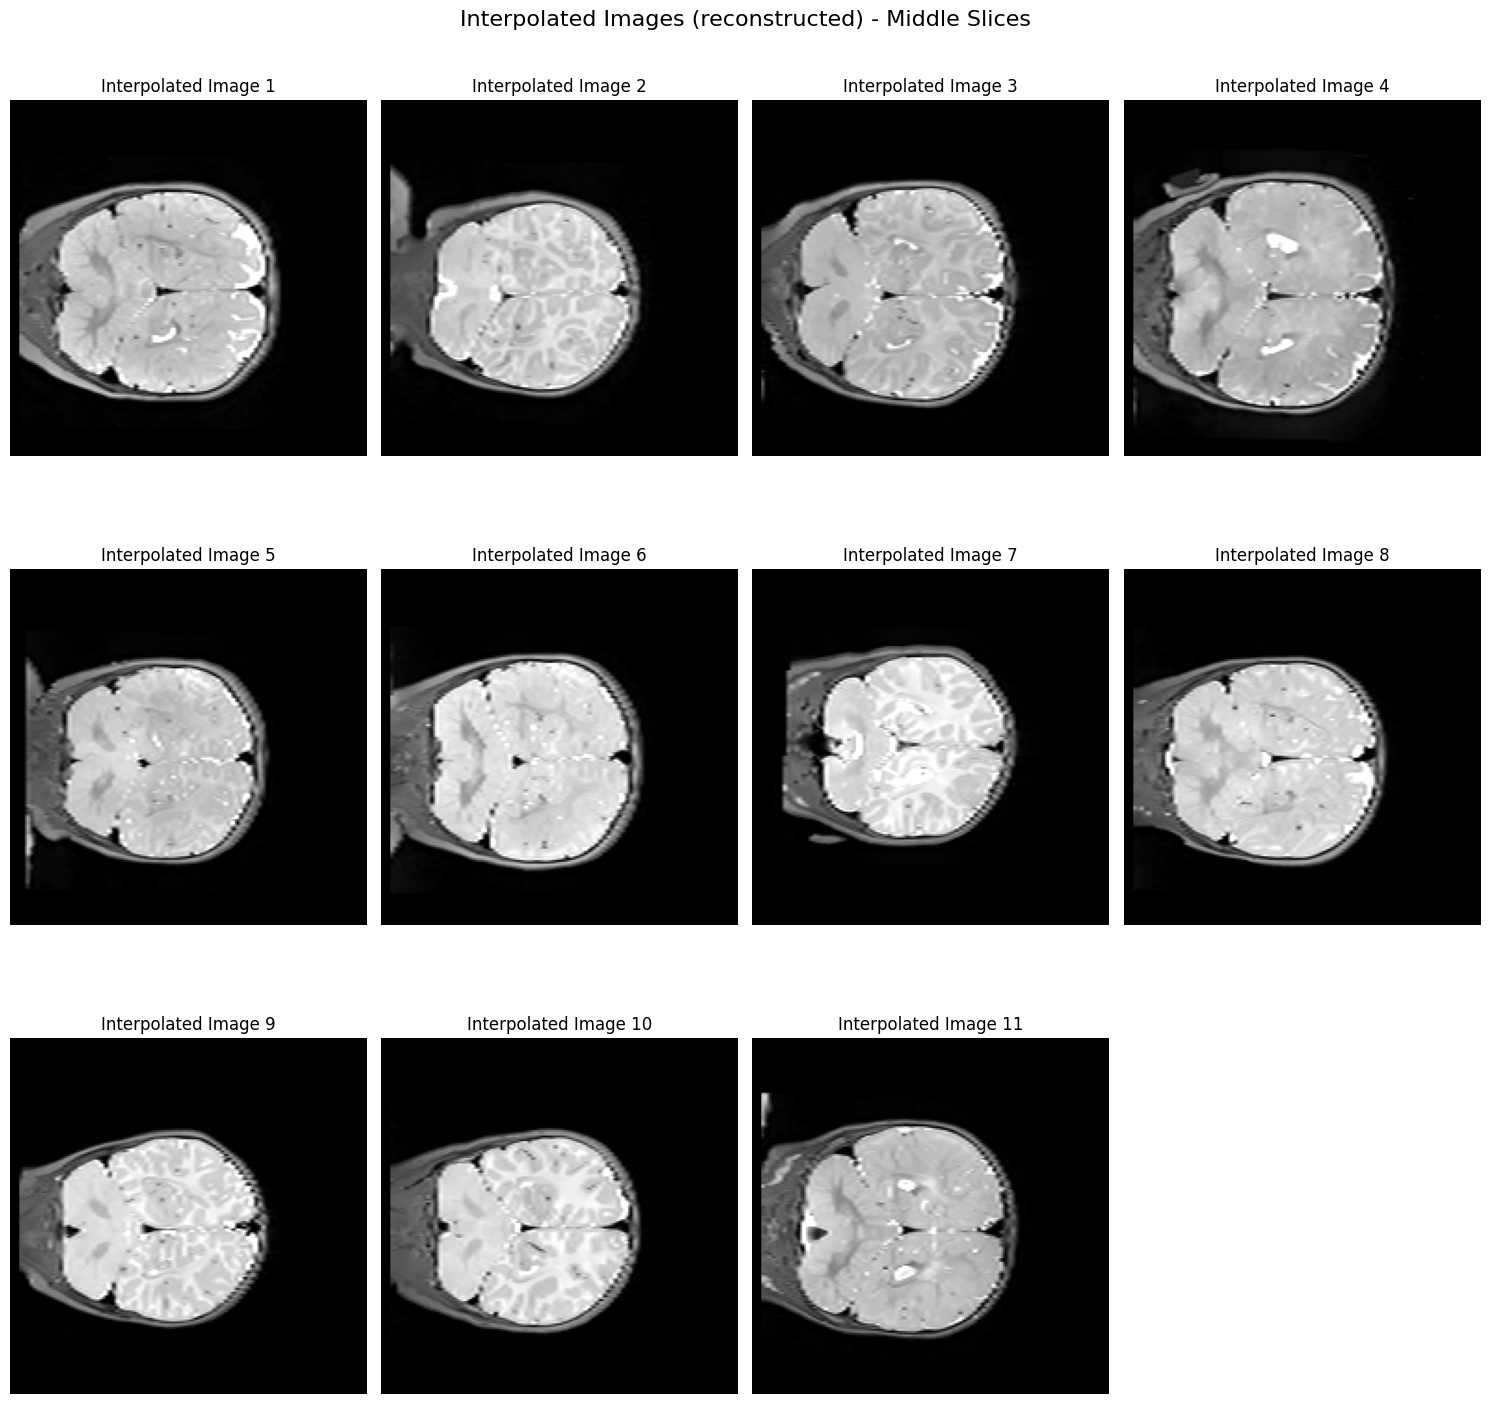

In [14]:
#plot the middle slice of all images in a grid
import matplotlib.pyplot as plt
import numpy as np
num_images = len(interpolated_images)
cols = 4
rows = num_images // cols + int(num_images % cols > 0)
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    mid_slice = interpolated_images[i].shape[2] // 2
    plt.imshow(interpolated_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Interpolated Image {i+1}")
plt.suptitle('Interpolated Images (reconstructed) - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()



In [6]:
#COMPARE PATCH SIZE 64 VS 32

generated_images32 = generated_images


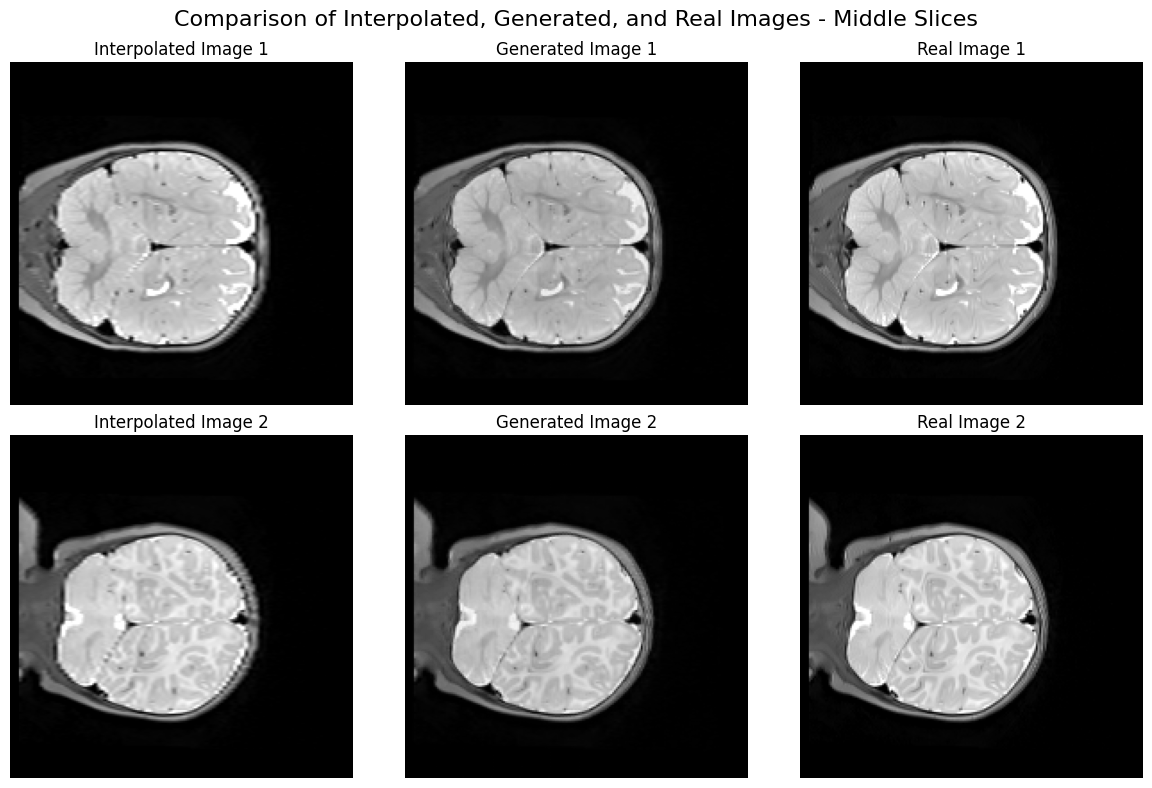

In [10]:
#plot middle slice of interpolated_images, generated_images32 and real_images in a grid for comparison, first 2 images. image typs as columns, image index as rows
import matplotlib.pyplot as plt
import numpy as np
num_images = 2
cols = 3
rows = num_images
plt.figure(figsize=(12, 8))
for i in range(num_images):
    plt.subplot(rows, cols, i * cols + 1)
    mid_slice = interpolated_images[i].shape[2] // 2
    plt.imshow(interpolated_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Interpolated Image {i+1}")
    
    plt.subplot(rows, cols, i * cols + 2)
    mid_slice = generated_images32[i].shape[2] // 2
    plt.imshow(generated_images32[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Generated Image {i+1}")
    
    plt.subplot(rows, cols, i * cols + 3)
    mid_slice = real_images[i].shape[2] // 2
    plt.imshow(real_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Real Image {i+1}")
plt.suptitle('Comparison of Interpolated, Generated, and Real Images - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()